# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Wahyu Dhia Satwika
- **Email:** ghintabsd@gmail.com
- **ID Dicoding:** wikaas

## Determining Business Questions.

- Question 1: What are the bicycle rental trends each month for the years 2011 and 2012?
- Question 2: What is the average duration on using bike rental?
- Question 3: Which season has the greatest impact on bicycle rental usage?

## Import Library

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import warnings

# Filter out FutureWarnings
warnings.filterwarnings("ignore", category=FutureWarning)

## Data Wrangling

### Gathering Data

First of all, we need to read the dataset with pandas. The dataset is from Kaggle, for this project i uploaded the dataset to github so you don't have to download it locally

In [40]:
hour_df = pd.read_csv("https://raw.githubusercontent.com/wahyudhiasatwika/Dicoding_dataset/main/Bike/hour.csv")

In [41]:
hour_df.head(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

In [42]:
hour_df.shape

(17379, 17)

The dataset has 17379 records and 17 columns. Next let's see how the data types using info()

In [43]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


As we can see, there is 17379 non-null data. Next let's check for missing value and duplicates data.

In [44]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [45]:
print("Duplicates data: ", hour_df.duplicated().sum())

Duplicates data:  0


For this dataset, there is no missing value and duplicates data

### Cleaning Data

#### Data Conversion
Since there's no missing and duplicate data, then we can fix and add some attribute from this data. First, let's turn some attribute into category data type and datetime

In [46]:
#Convert to datetime
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

#Conversion to category
hour_df['season'] = hour_df.season.astype('category')
hour_df['yr'] = hour_df.yr.astype('category')
hour_df['mnth'] = hour_df.mnth.astype('category')
hour_df['holiday'] = hour_df.holiday.astype('category')
hour_df['weekday'] = hour_df.weekday.astype('category')
hour_df['workingday'] = hour_df.workingday.astype('category')
hour_df['weathersit'] = hour_df.weathersit.astype('category')

In [47]:
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


#### Rename Attributes
Next, we can rename the attribute name to make it easier to read

In [48]:
#Rename Attributes
hour_df.rename(columns={'instant':'id',
                    'dteday':'datetime',
                    'yr' : 'year',
                    'hr' : 'hour',
                    'mnth' : 'month',
                    'weathersit' : 'weather',
                    'hum' : 'humidity',
                    'cnt' : 'count'},inplace=True)


Then, we replace the numeric values in category type to string to make it easier in analyzing

In [49]:
# Convert values for the 'season' column: 1:Winter, 2:Spring, 3:Summer, 4:Fall
hour_df['season'].replace({1:'Winter', 2:'Spring', 3:'Summer', 4:'Fall'}, inplace=True)

# Convert values for the 'year' column: 0:2011, 1:2012
hour_df['year'].replace({0: 2011, 1: 2012}, inplace=True)

# Convert values for the 'month' column: 1:Jan, 2:Feb, 3:Mar, 4:Apr, 5:May, 6:Jun, 7:Jul, 8:Aug, 9:Sep, 10:Oct, 11:Nov, 12:Dec
hour_df['month'].replace({1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'}, inplace=True)

# Convert values for the 'holiday' column: 0:No, 1:Yes
hour_df['holiday'].replace({0: 'No', 1: 'Yes'}, inplace=True)

# Convert values for the 'weekday' column: 0:Sunday, 1:Monday, 2:Tuesday, 3:Wednesday, 4:Thursday, 5:Friday, 6:Saturday
hour_df['weekday'].replace({0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'}, inplace=True)

# Convert values for the 'workingday' column: 0:No, 1:Yes
hour_df['workingday'].replace({0: 'No', 1: 'Yes'}, inplace=True)

# Convert values for the 'weather' column: 1:Clear, 2:Mist and Cloudy, 3:Light_Rain and Snow, 4:Heavy_Rain and Snow
hour_df['weather'].replace({1: 'Clear', 2: 'Mist and Cloudy', 3: 'Light_Rain and Snow', 4: 'Heavy_Rain and Snow'}, inplace=True)


#### Values Normalization
Based on the dataset, we need to normalize some of the attribute values to make it more accurate. Also, we need to make new attribute name registraion_month for retention rate later.

In [50]:
# Normalize temperature: (t-t_min)/(t_max-t_min) where t_min=-8 and t_max=+39, then scale to 41
hour_df['temp'] = hour_df['temp'] * 41

# Normalize feeling temperature: (t-t_min)/(t_max-t_min) where t_min=-16 and t_max=+50, then scale to 50
hour_df['atemp'] = hour_df['atemp'] * 50

# Normalize humidity: Divide by its maximum value (100)
hour_df['humidity'] = hour_df['humidity'] * 100

# Normalize wind speed: Divide by its maximum value (67)
hour_df['windspeed'] = hour_df['windspeed'] * 67

# Made new attribute column for retention_rate visualization later
hour_df['registration_month'] = pd.to_datetime(hour_df['datetime']).dt.to_period('M')

In [51]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   id                  17379 non-null  int64         
 1   datetime            17379 non-null  datetime64[ns]
 2   season              17379 non-null  category      
 3   year                17379 non-null  category      
 4   month               17379 non-null  category      
 5   hour                17379 non-null  int64         
 6   holiday             17379 non-null  category      
 7   weekday             17379 non-null  category      
 8   workingday          17379 non-null  category      
 9   weather             17379 non-null  category      
 10  temp                17379 non-null  float64       
 11  atemp               17379 non-null  float64       
 12  humidity            17379 non-null  float64       
 13  windspeed           17379 non-null  float64   

In [52]:
hour_df.head(5)

,id,datetime,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,registration_month
0,1,2011-01-01,Winter,2011,Jan,0,No,Saturday,No,Clear,9.84,14.395,81.0,0.0,3,13,16,2011-01
1,2,2011-01-01,Winter,2011,Jan,1,No,Saturday,No,Clear,9.02,13.635,80.0,0.0,8,32,40,2011-01
2,3,2011-01-01,Winter,2011,Jan,2,No,Saturday,No,Clear,9.02,13.635,80.0,0.0,5,27,32,2011-01
3,4,2011-01-01,Winter,2011,Jan,3,No,Saturday,No,Clear,9.84,14.395,75.0,0.0,3,10,13,2011-01
4,5,2011-01-01,Winter,2011,Jan,4,No,Saturday,No,Clear,9.84,14.395,75.0,0.0,0,1,1,2011-01


Since we have done the cleaning data, we can save it into new csv named hour_data.csv

In [53]:
hour_df.to_csv('hour_data.csv', index=False)

## Exploratory Data Analysis (EDA)

### Explore data hour_df

Use describe method to see the summarize of statistic from the dataframe

In [54]:
hour_df.describe(include="all")

,id,datetime,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,registration_month
count,17379.0000,17379,17379,17379.0,17379,17379.000000,17379,17379,17379,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379
unique,NaN,NaN,4,2.0,12,NaN,2,7,2,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24
top,NaN,NaN,Summer,2012.0,May,NaN,No,Saturday,Yes,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2012-08
freq,NaN,NaN,4496,8734.0,1488,NaN,16879,2512,11865,11413,NaN,NaN,NaN,NaN,NaN,NaN,NaN,744
mean,8690.0000,2012-01-02 04:08:34.552045568,NaN,NaN,NaN,11.546752,NaN,NaN,NaN,NaN,20.376474,23.788755,62.722884,12.736540,35.676218,153.786869,189.463088,NaN
min,1.0000,2011-01-01 00:00:00,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,0.820000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,NaN
25%,4345.5000,2011-07-04 00:00:00,NaN,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,13.940000,16.665000,48.000000,7.001500,4.000000,34.000000,40.000000,NaN
50%,8690.0000,2012-01-02 00:00:00,NaN,NaN,NaN,12.000000,NaN,NaN,NaN,NaN,20.500000,24.240000,63.000000,12.998000,17.000000,115.000000,142.000000,NaN
75%,13034.5000,2012-07-02 00:00:00,NaN,NaN,NaN,18.000000,NaN,NaN,NaN,NaN,27.060000,31.060000,78.000000,16.997900,48.000000,220.000000,281.000000,NaN
max,17379.0000,2012-12-31 00:00:00,NaN,NaN,NaN,23.000000,NaN,NaN,NaN,NaN,41.000000,50.000000,100.000000,56.996900,367.000000,886.000000,977.000000,NaN


Use groupby on year attribute to see the statistic

In [55]:
hour_df.groupby(by="year").agg({"count": ["max", "min"],
                            "temp": ["max", "min", "mean", "std", ],
                            "atemp": ["max", "min", "mean", "std", ],
                            "humidity": ["max", "min", "mean", "std", ],
                            "windspeed": ["max", "min", "mean", "std", ]
})

count       temp                             atemp                   \
       max min    max   min       mean       std    max   min       mean   
year                                                                       
2011   651   1  39.36  0.82  20.051822  8.115681  50.00  0.00  23.450023   
2012   977   1  41.00  0.82  20.697818  7.656830  46.21  0.76  24.124036   

               humidity                             windspeed                  \
           std      max   min       mean        std       max  min       mean   
year                                                                            
2011  8.837989    100.0   0.0  64.342973  19.629328   56.9969  0.0  12.808542   
2012  8.329374    100.0  16.0  61.119304  18.818447   54.0020  0.0  12.665271   

                
           std  
year            
2011  8.253813  
2012  8.139811

In [56]:
hour_df.groupby(by="year").agg({
    "id": "nunique",
    "count": "sum"
}).sort_values(by="year", ascending=False)

,id,count
year,,
2012,8734,2049576
2011,8645,1243103


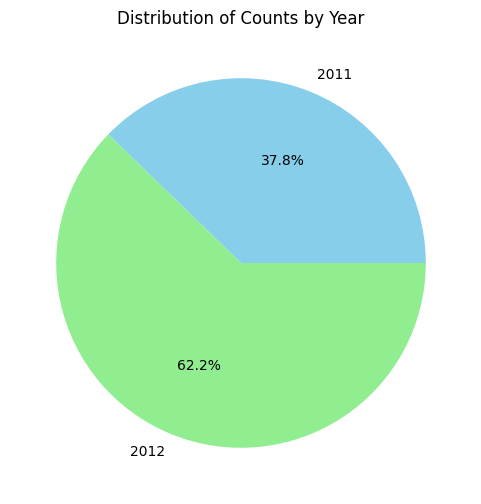

In [57]:
year_counts = hour_df.groupby('year')['count'].sum()

# Create a pie chart
plt.figure(figsize=(6, 6))  
plt.pie(year_counts, labels=year_counts.index, autopct='%1.1f%%', colors=['skyblue', 'lightgreen'])
plt.title('Distribution of Counts by Year')
plt.show()


As we can see, year 2011 and 2012 have almost the same transaction but difference on the total rent. Year 2012 has more rent than 2011. Next let's use groupby on month attribute

In [58]:
hour_df.groupby(by="month").agg({"count": ["max", "min"],
                            "temp": ["max", "min", "mean", "std", ],
                            "atemp": ["max", "min", "mean", "std", ],
                            "humidity": ["max", "min", "mean", "std", ],
                            "windspeed": ["max", "min", "mean", "std", ]
})

count       temp                               atemp                     \
        max min    max    min       mean       std     max     min       mean   
month                                                                           
Jan     559   1  23.78   0.82   9.743597  4.096338  27.275   0.000  12.033803   
Feb     610   1  27.06   2.46  12.308561  4.280341  31.060   2.275  15.031033   
Mar     957   1  29.52   4.92  16.027020  5.031689  32.575   4.545  19.114956   
Apr     822   1  32.80   9.84  19.270856  4.624631  34.850  11.365  22.855480   
May     873   1  36.90  13.94  24.386734  3.983271  41.665  15.150  28.283098   
Jun     900   1  40.18  18.86  28.047986  3.880284  46.210  22.725  31.912285   
Jul     913   1  41.00  23.78  30.974288  3.399199  50.000  27.275  35.204694   
Aug     941   1  37.72  21.32  29.056908  2.957676  42.425  12.120  32.577810   
Sep     977   1  35.26  15.58  25.276771  3.336836  39.395  19.695  28.967223   
Oct     963   1  30.34   9.02  19.974431  4.138385  34.090   9.850  23.695631   
Nov     729   1  26.24   8.20  15.137189  3.616814  31.060   9.850  18.366949   
Dec     759   1  24.60   5.74  13.290856  3.450590  31.060   7.575  16.314794   

                humidity                             windspeed       \
            std      max   min       mean        std       max  min   
month                                                                 
Jan    4.863983    100.0  21.0  58.093072  18.819737   43.9989  0.0   
Feb    5.089051    100.0   8.0  56.721104  20.426090   54.0020  0.0   
Mar    5.922832    100.0   0.0  58.904956  22.856545   46.0022  0.0   
Apr    5.102208    100.0  16.0  58.811413  21.862700   47.9988  0.0   
May    4.214414    100.0  21.0  68.895833  17.750851   40.9973  0.0   
Jun    3.933680    100.0  20.0  57.580556  18.332666   39.0007  0.0   
Jul    3.931092     94.0  16.0  59.787634  17.192116   56.9969  0.0   
Aug    4.057346     94.0  25.0  63.722712  16.885551   55.9986  0.0   
Sep    3.677879    100.0  28.0  71.445372  16.857980   43.0006  0.0   
Oct    4.513002    100.0  27.0  68.949001  16.877658   39.0007  0.0   
Nov    4.211253    100.0  16.0  62.504523  17.735153   43.0006  0.0   
Dec    4.096556    100.0  26.0  66.611598  17.306639   43.9989  0.0   

                            
            mean       std  
month                       
Jan    13.905913  8.423712  
Feb    14.469407  9.970645  
Mar    14.908628  8.418710  
Apr    15.699657  8.529899  
May    12.260253  7.233002  
Jun    12.423135  7.230965  
Jul    11.125944  6.783734  
Aug    11.488388  7.661126  
Sep    11.112367  7.255810  
Oct    11.518584  8.199831  
Nov    12.312176  8.127898  
Dec    11.830479  8.563764

In [59]:
hour_df.groupby(by="month").agg({
    "id": "nunique",
    "count": "sum"
}).sort_values(by="month", ascending=False)

,id,count
month,,
Dec,1483,211036
Nov,1437,254831
Oct,1451,322352
Sep,1437,345991
Aug,1475,351194
Jul,1488,344948
Jun,1440,346342
May,1488,331686
Apr,1437,269094


In [60]:
hour_df.groupby(['year', 'month']).agg({'count': 'sum'})



count
year month        
2011 Jan     38189
     Feb     48215
     Mar     64045
     Apr     94870
     May    135821
     Jun    143512
     Jul    141341
     Aug    136691
     Sep    127418
     Oct    123511
     Nov    102167
     Dec     87323
2012 Jan     96744
     Feb    103137
     Mar    164875
     Apr    174224
     May    195865
     Jun    202830
     Jul    203607
     Aug    214503
     Sep    218573
     Oct    198841
     Nov    152664
     Dec    123713

Use the same for holiday, working day, and weekday

In [61]:
hour_df.groupby(by="holiday").id.nunique().sort_values(ascending=False)

holiday
No     16879
Yes      500
Name: id, dtype: int64

In [62]:
hour_df.groupby(by="workingday").id.nunique().sort_values(ascending=False)

workingday
Yes    11865
No      5514
Name: id, dtype: int64

In [63]:
hour_df.groupby(by="weekday").id.nunique().sort_values(ascending=False)

weekday
Saturday     2512
Sunday       2502
Friday       2487
Monday       2479
Wednesday    2475
Thursday     2471
Tuesday      2453
Name: id, dtype: int64

As we can see, people tend to rent bikes more frequently on working days. Next let's see for the season and weather attribute

In [64]:
hour_df.groupby(by="season").agg({
    "id": "nunique",
    "count": "sum"
}).sort_values(by="season", ascending=False)

,id,count
season,,
Fall,4232,841613
Summer,4496,1061129
Spring,4409,918589
Winter,4242,471348


In [65]:
hour_df.groupby(by="weather").agg({
    "id": "nunique",
    "count": "sum"
})

,id,count
weather,,
Clear,11413,2338173
Mist and Cloudy,4544,795952
Light_Rain and Snow,1419,158331
Heavy_Rain and Snow,3,223


For the last EDA, let's see the distribution of casual and registered attributes on each month

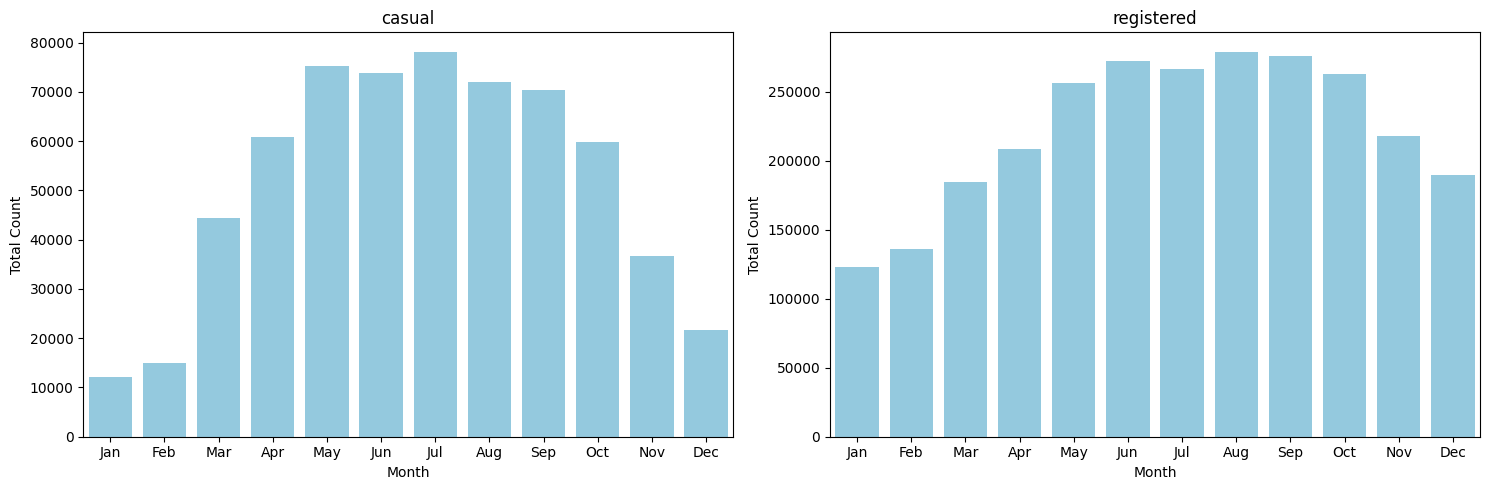

In [66]:
columns = ['casual', 'registered']

# Create a figure with 3 subplots, each representing a bar chart for one of the columns
fig, ax = plt.subplots(1, 2, figsize=(15,5))  

# Loop through each subplot and plot the bar chart
for i, ax in enumerate(ax):
    sns.barplot(x='month', y=columns[i], data=hour_df, ax=ax, estimator=sum, ci=None, color='skyblue')  
    ax.set_title(columns[i])
    ax.set_xlabel("Month")
    ax.set_ylabel("Total Count")

plt.tight_layout()
plt.show()

## Visualization & Explanatory Analysis

### Question 1: What are the bicycle rental trends each month for the years 2011 and 2012?

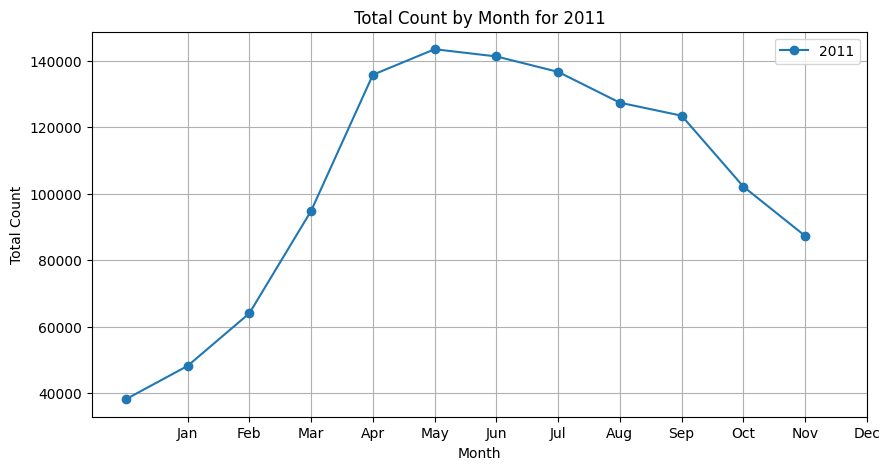

In [67]:
# Filter data for year 2011
data_2011 = hour_df[hour_df['year'] == 2011]
# Group the date based of the month and total count
monthly_counts_2011 = data_2011.groupby('month')['count'].sum()

# Line Chart
plt.figure(figsize=(10, 5))
plt.plot(monthly_counts_2011.index, monthly_counts_2011.values, marker='o', linestyle='-', label='2011')
plt.xlabel('Month')
plt.ylabel('Total Count')
plt.title('Total Count by Month for 2011')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend()
plt.grid(True)
plt.show()

Based on the chart, we can see for year 2011 with the range April until September have the highest demand of rental bike.

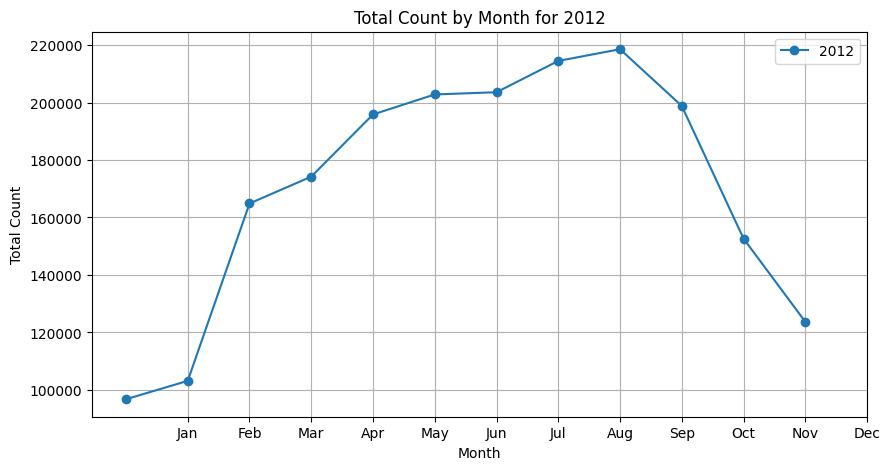

In [68]:
# Filter data for year 2012
data_2012 = hour_df[hour_df['year'] == 2012]
# Group the date based of the month and total count
monthly_counts_2012 = data_2012.groupby('month')['count'].sum()

# Line chart
plt.figure(figsize=(10, 5))
plt.plot(monthly_counts_2012.index, monthly_counts_2012.values, marker='o', linestyle='-', label='2012')
plt.xlabel('Month')
plt.ylabel('Total Count')
plt.title('Total Count by Month for 2012')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend()
plt.grid(True)
plt.show()

On year 2012, there have been an increased demand of bike rental. We can see on August has the highest usage of rental bikes. Overall, on April untul September have the highest usage of bike rental. 

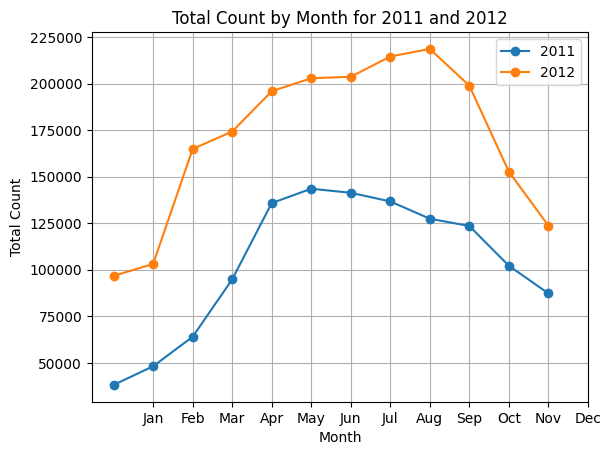

In [69]:
# 2011 Line Chart
plt.plot(monthly_counts_2011.index, monthly_counts_2011.values, marker='o', linestyle='-', label='2011')
# 2012 Line Chart
plt.plot(monthly_counts_2012.index, monthly_counts_2012.values, marker='o', linestyle='-', label='2012')

plt.xlabel('Month')
plt.ylabel('Total Count')
plt.title('Total Count by Month for 2011 and 2012')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend()
plt.grid(True)
plt.show()

To make it more clear and easier to analyze, we make it into one chart. From two year, April until September have the highest usage of bike rental with an increasing demand on year 2012. 

### Question 2: What is the average duration on using bike rental?

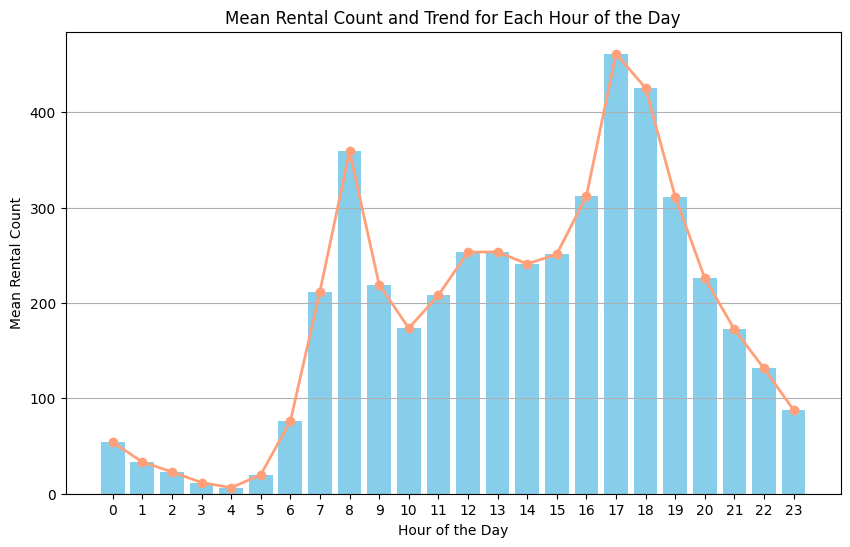

In [70]:
# Group data by hour and calculate the mean count for each hour
hourly_mean_count = hour_df.groupby('hour')['count'].mean()

plt.figure(figsize=(10, 6))
plt.bar(hourly_mean_count.index, hourly_mean_count.values, color='skyblue')

# Add a line plot to visualize the trend
plt.plot(hourly_mean_count.index, hourly_mean_count.values, color='lightsalmon', marker='o', linestyle='-', linewidth=2)

plt.xlabel('Hour of the Day')
plt.ylabel('Mean Rental Count')
plt.title('Mean Rental Count and Trend for Each Hour of the Day')
plt.xticks(range(24))
plt.grid(axis='y')
plt.show()


From the chart we see the average of people using bike rental and the tren of bike rental. To make it easier, let's make the five highest average to skyblue color and light gray for the rest.

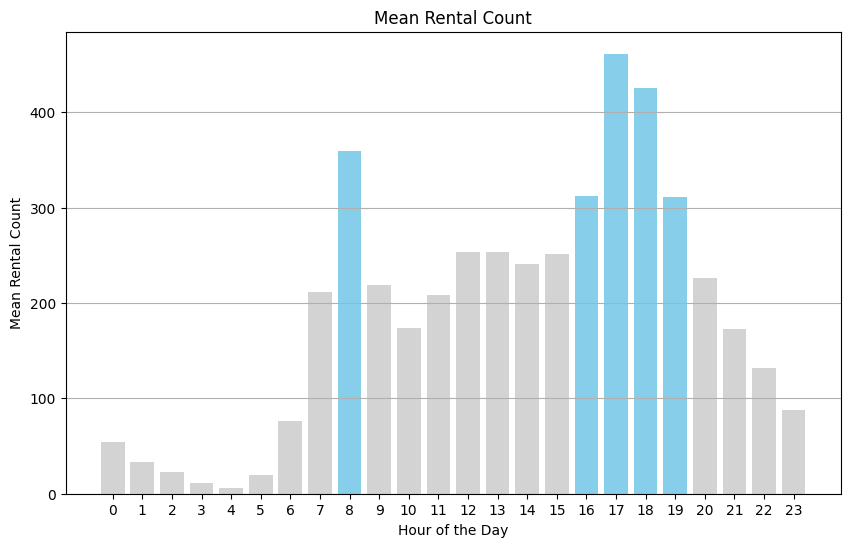

In [71]:
# Group data by hour and calculate the mean count for each hour
hourly_mean_count = hour_df.groupby('hour')['count'].mean()

# Sort the mean counts to get the five highest
top_three_hours = hourly_mean_count.sort_values(ascending=False).head(5)

# Bar Chart
plt.figure(figsize=(10, 6))

# Set the bar for five highest into skyblue color
plt.bar(top_three_hours.index, top_three_hours.values, color='skyblue')
# The rest get light gray color
other_hours = hourly_mean_count[~hourly_mean_count.index.isin(top_three_hours.index)]
plt.bar(other_hours.index, other_hours.values, color='lightgray')
plt.xlabel('Hour of the Day')
plt.ylabel('Mean Rental Count')
plt.title('Mean Rental Count')
plt.xticks(range(24))
plt.grid(axis='y')
plt.show()

Based on the chart, We can see people often use bike rental with the duration 8 hours and 16 until 19 hours

### Question 3: Which season has the greatest impact on bicycle rental usage?

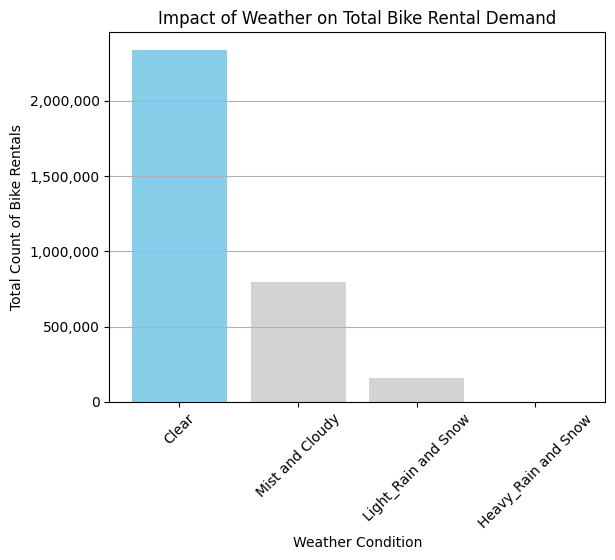

In [72]:
# Group data by weather situation and calculate the total count of bike rentals for each weather situation
weather_counts = hour_df.groupby('weather')['count'].sum()

# Determine the highest count
max_count = weather_counts.max()
max_index = weather_counts[weather_counts == max_count].index[0]

# Set the bar into lightgray color
colors = ['lightgray'] * len(weather_counts)

# Set the highest bar to sky blue
colors[weather_counts.index.get_loc(max_index)] = 'skyblue'

# Bar Chart
plt.bar(weather_counts.index, weather_counts, color=colors)
plt.xlabel('Weather Condition')
plt.ylabel('Total Count of Bike Rentals')
plt.title('Impact of Weather on Total Bike Rental Demand')
plt.xticks(rotation=45)  
plt.grid(axis='y')  

# Format y-axis ticks with commas
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.show()

The weather sure have a big impact on the usage of bike rental. We can see on clear weather there are a total of more than 2 million usage while the other are less than 800 thousands usage.

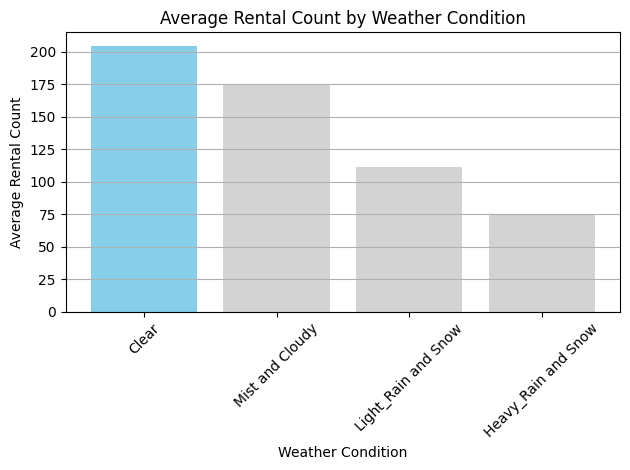

In [73]:
# Group the data by weather condition and calculate the average rental count for each condition
weather_counts = hour_df.groupby('weather')['count'].mean()

# Determine the highest average rental count
max_count = weather_counts.max()
max_index = weather_counts[weather_counts == max_count].index[0]

# Set the bar into lightgray color
colors = ['lightgray'] * len(weather_counts)

# Set the highest bar to sky blue
colors[weather_counts.index.get_loc(max_index)] = 'skyblue'

# Bar Chart
plt.bar(weather_counts.index, weather_counts, color=colors)
plt.xlabel('Weather Condition')
plt.ylabel('Average Rental Count')
plt.title('Average Rental Count by Weather Condition')
plt.xticks(rotation=45)  
plt.grid(axis='y')  
plt.tight_layout()
plt.show()


On the average count, clear condition still has the highest usage of bike rental. The other weather that we can consider is mist and clody because it has 175 average usage which is close to clear weather even though the total count are still far below clear weather.

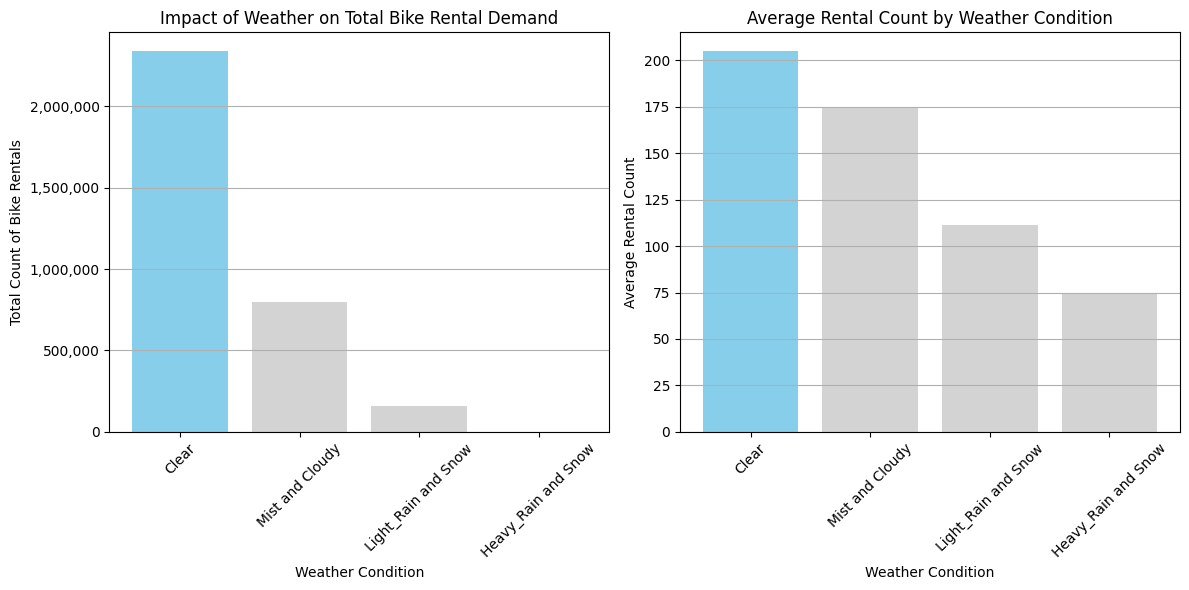

In [74]:
#Setting up the Total Bar Chart
weather_counts_total = hour_df.groupby('weather')['count'].sum()
max_total_count = weather_counts_total.max()
colors_total = ['lightgray'] * len(weather_counts_total)
max_total_index = weather_counts_total[weather_counts_total == max_total_count].index[0]
colors_total[weather_counts_total.index.get_loc(max_total_index)] = 'skyblue'

#Setting up the Average Bar Chart
weather_counts_avg = hour_df.groupby('weather')['count'].mean()
max_avg_count = weather_counts_avg.max()
colors_avg = ['lightgray'] * len(weather_counts_avg)
max_avg_index = weather_counts_avg[weather_counts_avg == max_avg_count].index[0]
colors_avg[weather_counts_avg.index.get_loc(max_avg_index)] = 'skyblue'

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Total bar Chart
axes[0].bar(weather_counts_total.index, weather_counts_total, color=colors_total)
axes[0].set_xlabel('Weather Condition')
axes[0].set_ylabel('Total Count of Bike Rentals')
axes[0].set_title('Impact of Weather on Total Bike Rental Demand')
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(axis='y')
axes[0].yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

# Average Bar Chart
axes[1].bar(weather_counts_avg.index, weather_counts_avg, color=colors_avg)
axes[1].set_xlabel('Weather Condition')
axes[1].set_ylabel('Average Rental Count')
axes[1].set_title('Average Rental Count by Weather Condition')
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(axis='y')

# Adjust layout
plt.tight_layout()
plt.show()



So, we can conclude weather have a big impact on usage bike rental and clear weather have the highest contribution on bike rental.

### Advanced Analysis

Let's use RFM Analysis for advanced analysis. Even though on the dataset there are no customer id, let's use it to analyze the highest rental and the last day since they use the bike rent

In [75]:
# Calculate Recency, Frequency, and Monetary attributes
rfm_df = hour_df.groupby('id').agg({
    'datetime': lambda x: (pd.Timestamp.now() - x.max()).days,  # Recency: Number of days since last rental
    'id': 'count',  # Frequency: Number of rentals
    'count': 'max'  # Monetary: Total count of rental bikes
}).rename(columns={
    'datetime': 'recency',
    'id': 'frequency',
    'count': 'monetary'
})

# Print the RFM data for the first few customers
print(rfm_df.head())

    recency  frequency  monetary
id                              
1      4810          1        16
2      4810          1        40
3      4810          1        32
4      4810          1        13
5      4810          1         1


In [76]:
# Sort customers based on the highest count of rental bikes
highest_count_customers = rfm_df.sort_values(by='monetary', ascending=False)
print("Top 5 customers with the highest count of rental bikes:")
print(highest_count_customers.head(5))

Top 5 customers with the highest count of rental bikes:
       recency  frequency  monetary
id                                 
14774     4190          1       977
14965     4182          1       976
14749     4191          1       970
14726     4192          1       968
15085     4177          1       967


I sorted the five highest bike rent that people did. We can see the recency that means the last time they use bike rents is on 4177 until 4192 days. The frequency is 1 because the dataset don't have customer id, so we can't calculate how many they have already used bike rent. The last one, monetary should be a frequency of total count but since the dataset doesn't have customer so i used highest count of rental bikes for monetary and there are around 967 until 977. 

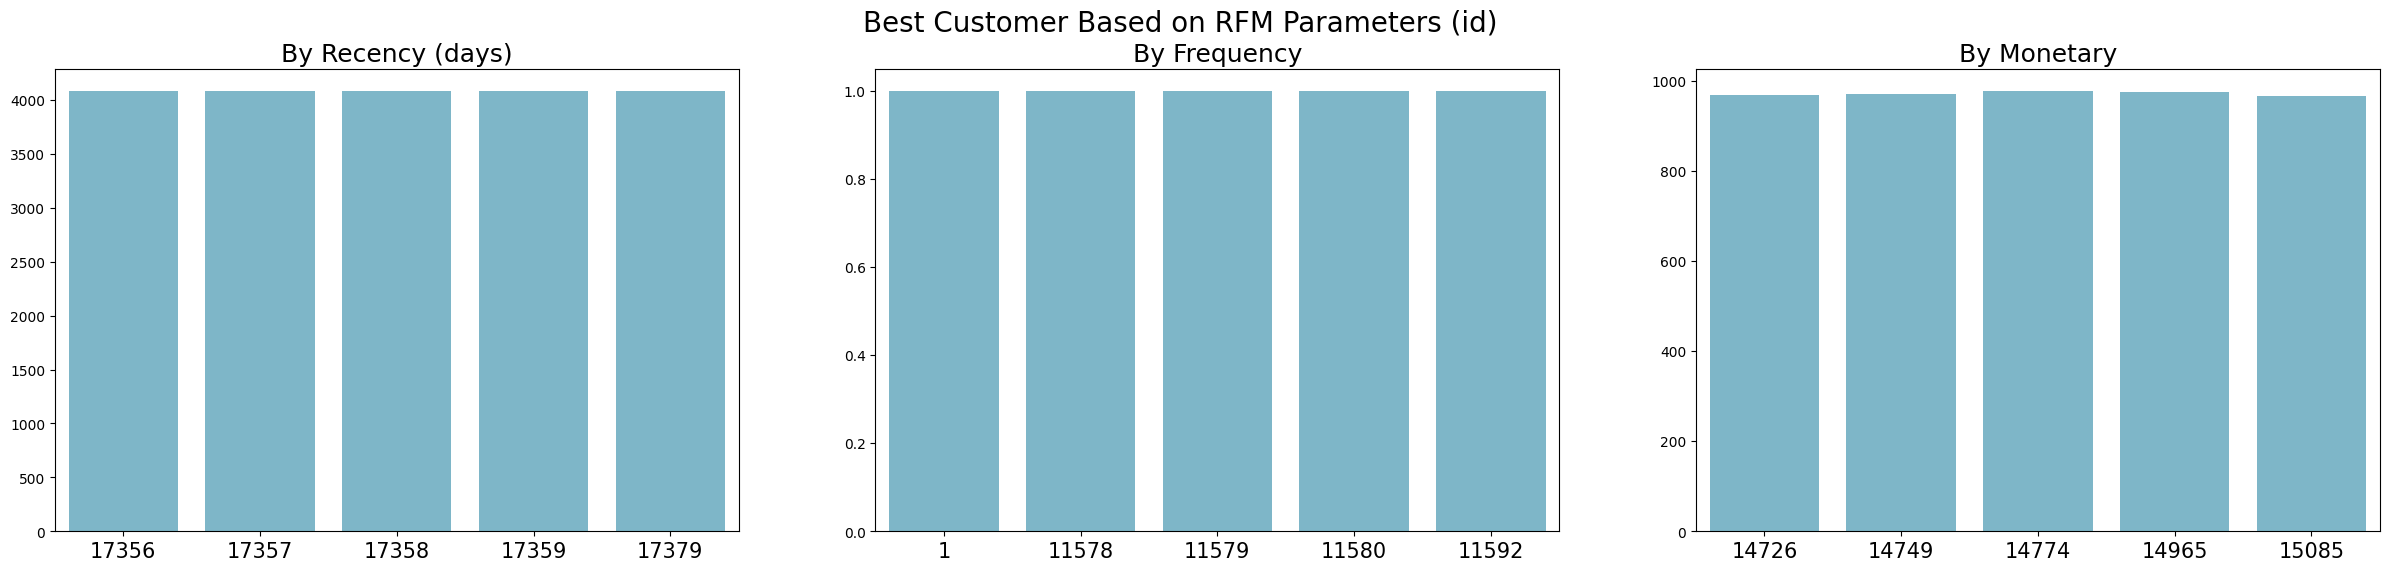

In [77]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))
 
colors = ["#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4"]

sns.barplot(y="recency", x="id", data=rfm_df.sort_values(by="recency", ascending=True).head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("By Recency (days)", loc="center", fontsize=18)
ax[0].tick_params(axis ='x', labelsize=15)
 
sns.barplot(y="frequency", x="id", data=rfm_df.sort_values(by="frequency", ascending=False).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("By Frequency", loc="center", fontsize=18)
ax[1].tick_params(axis='x', labelsize=15)
 
sns.barplot(y="monetary", x="id", data=rfm_df.sort_values(by="monetary", ascending=False).head(5), palette=colors, ax=ax[2])
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title("By Monetary", loc="center", fontsize=18)
ax[2].tick_params(axis='x', labelsize=15)
 
plt.suptitle("Best Customer Based on RFM Parameters (id)", fontsize=20)
plt.show()

These are the charts showing the RFM of five highest people that used bike rental

### Retention Rate Analysis

In [78]:
# Group data by registration month and calculate metrics for each cohort
cohort_data = hour_df.groupby('registration_month').agg({
    'id': 'nunique',  # Number of unique customers
    'count': 'sum'  # Total count of rentals
})

# Calculate retention rate for each cohort
cohort_data['retention_rate'] = cohort_data['id'] / cohort_data['id'].iloc[0]

# Calculate average rental count for each cohort
cohort_data['average_rental_count'] = cohort_data['count'] / cohort_data['id']

# Print or visualize the results
print(cohort_data)



                     id   count  retention_rate  average_rental_count
registration_month                                                   
2011-01             688   38189        1.000000             55.507267
2011-02             649   48215        0.943314             74.291217
2011-03             730   64045        1.061047             87.732877
2011-04             719   94870        1.045058            131.947149
2011-05             744  135821        1.081395            182.555108
2011-06             720  143512        1.046512            199.322222
2011-07             744  141341        1.081395            189.974462
2011-08             731  136691        1.062500            186.991792
2011-09             717  127418        1.042151            177.709902
2011-10             743  123511        1.079942            166.232840
2011-11             719  102167        1.045058            142.095967
2011-12             741   87323        1.077035            117.844804
2012-01             

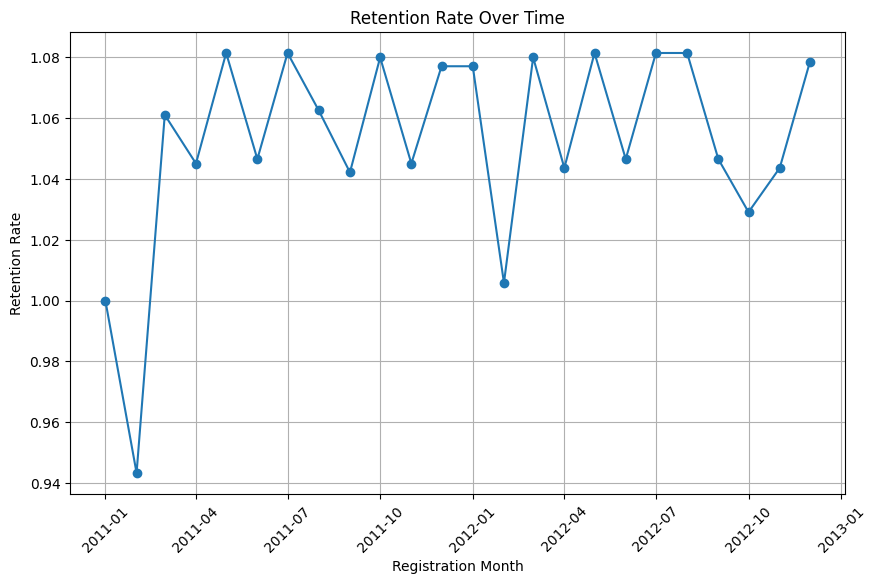

In [79]:
# Convert Period index to Timestamp
x_values = cohort_data.index.to_timestamp()

# Plot retention rate over time
plt.figure(figsize=(10, 6))
plt.plot(x_values, cohort_data['retention_rate'], marker='o', linestyle='-')
plt.xlabel('Registration Month')
plt.ylabel('Retention Rate')
plt.title('Retention Rate Over Time')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


For the retention, it should be calculating the period of people using bike rent. Since there are no customer id, so the chart only showing a tren that are around 1 which mean the frequency of people using bike rents are 1. 

## Conclusion

- Conclusion for Question 1: There is an increasing demand of bike rental that we can see year 2012 has more total count than year 2011. Other than that, on each year it has the same highest month on the usage of bike rental which are on April until September.

- Conclusion for Question 2: The average duration of people using bike rental are 8 hours and 16 until 19 hours 

- Conclusion for Question 3: Weather have a big impact on usage bike rental and clear weather have the highest contribution on bike rental.

- Conclusion for RFM Analysis: Since there are no customer id, we can only take the information of recency and monetary with the highest count of rental bike as monetary. We can see the highest usage are around  967 until 977 with a recency of 4177 until 4192 days

- Conclusion for Retention Rate Analysis: Since there are no customer id, we can only take the information of the dataset having retention around 1 on each month